In [1]:
import numpy as np
import matplotlib.pyplot as plt
import particle.literals
import flavio
plt.rcParams['text.usetex'] = True

In [2]:
hbar = 6.582119569e-13 # GeV ps
me = particle.literals.e_minus.mass / 1000 # GeV
mmu = particle.literals.mu_minus.mass / 1000 # GeV
mtau = particle.literals.tau_minus.mass / 1000 # GeV
fa = 1000 # GeV

mB = particle.literals.B_plus.mass / 1000 # GeV
mK = particle.literals.K_plus.mass / 1000 # GeV
mB0 = particle.literals.B_0.mass / 1000 # GeV
mKs = particle.literals.Kst_892_0.mass / 1000 #GeV
GammaB = particle.literals.B_plus.width / 1000 # GeV
GammaB0 = particle.literals.B_0.width / 1000 # GeV
f0 = 0.3
A0 = 0.374
alpha_em = 1/137
sW = np.sqrt(0.2229)

mtop = particle.literals.t.mass / 1000
mcharm = particle.literals.c.mass / 1000
mup = particle.literals.u.mass / 1000
mW = particle.literals.W_minus.mass / 1000

In [33]:
2e-10/(GammaB0*1e-9)/1e6

461573.96722824837

In [3]:
def tau_alp(ma, cll):
    if ma > 2*mtau:
        ml = mtau
    elif ma > 2*mmu:
        ml = mmu
    else:
        ml = me
    return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))

In [4]:
tau_alp(0.25, 0.3)

0.12325205678290786

In [5]:
tau_alp(3, 0.07)

0.1010556319802759

/tmp/ipykernel_44350/3975953471.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))
/tmp/ipykernel_44350/3975953471.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


(0.1, 1000.0)

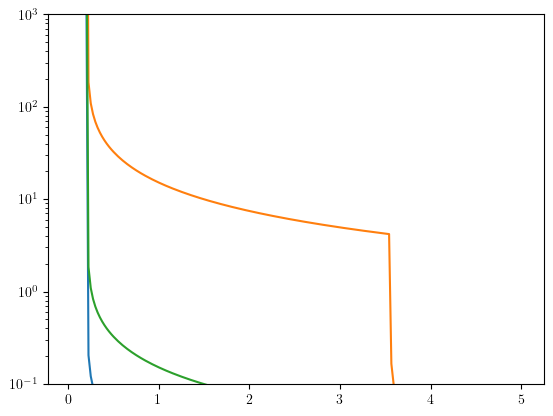

In [6]:
plt.semilogy(np.linspace(0, 5, 200), [tau_alp(m, 0.3) for m in np.linspace(0, 5, 200)])
plt.semilogy(np.linspace(0, 5, 200), [tau_alp(m, 0.01) for m in np.linspace(0, 5, 200)])
plt.semilogy(np.linspace(0, 5, 200), [tau_alp(m, 0.1) for m in np.linspace(0, 5, 200)])
plt.ylim([0.1, 1e3])

In [7]:
def loop_function(x):
    return x*(1+x*(np.log(x) - 1))/(1-x)**2

In [8]:
loop_function(mtop**2/mW**2)

1.2146125933182925

In [9]:
loop_function(mcharm**2/mW**2)

0.0002492021063673587

In [10]:
loop_function(mup**2/mW**2)

7.221774293056799e-10

In [11]:
xit = flavio.physics.ckm.xi('t', 'bs')(flavio.default_parameters.get_central_all())

/home/jorge/.local/lib/python3.12/site-packages/ckmutil/ckm.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  c12 = cos(t12)
/home/jorge/.local/lib/python3.12/site-packages/ckmutil/ckm.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  c23 = cos(t23)
/home/jorge/.local/lib/python3.12/site-packages/ckmutil/ckm.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  s12 = sin(t12)
/home/jorge/.local/lib/python3.12/site-packages/ckmutil/ckm.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  s23 = sin(t23)


In [12]:
xic = flavio.physics.ckm.xi('c', 'bs')(flavio.default_parameters.get_central_all())

In [13]:
xiu = flavio.physics.ckm.xi('u', 'bs')(flavio.default_parameters.get_central_all())

In [14]:
def gbs(cll, nlep=1):
    return -3*nlep*(4*np.pi*alpha_em)**2/(16*64*np.pi**4*sW**4)*cll/fa*(xit * loop_function(mtop**2/mW**2) + xic * loop_function(mcharm**2/mW**2) + xiu * loop_function(mup**2/mW**2))

In [19]:
beta=gbs(1,3)

In [16]:
def BR_BKa(cll, ma, nlep=1):
    return mB**3*abs(gbs(cll, nlep))**2/(64*np.pi)*f0**2*(1-mK**2/mB**2)**2*np.sqrt((1-(ma+mK)**2/mB**2)*(1-(ma-mK)**2/mB**2))/GammaB

In [20]:
alpha = [BR_BKa(1, ma, 3)/abs(gbs(1, 3))**2*GammaB for ma in np.linspace(2*mmu, mB0, 200)]

/tmp/ipykernel_44350/3672583717.py:2: RuntimeWarning: invalid value encountered in sqrt
  return mB**3*abs(gbs(cll, nlep))**2/(64*np.pi)*f0**2*(1-mK**2/mB**2)**2*np.sqrt((1-(ma+mK)**2/mB**2)*(1-(ma-mK)**2/mB**2))/GammaB


/tmp/ipykernel_44350/3672583717.py:2: RuntimeWarning: invalid value encountered in sqrt
  return mB**3*abs(gbs(cll, nlep))**2/(64*np.pi)*f0**2*(1-mK**2/mB**2)**2*np.sqrt((1-(ma+mK)**2/mB**2)*(1-(ma-mK)**2/mB**2))/GammaB


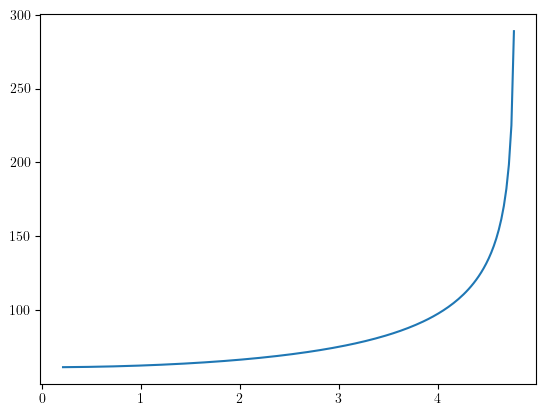

In [28]:
plt.plot(np.linspace(2*mmu, mB0, 200), [np.sqrt(2e-10/(BR_BKa(1, m, 3)*GammaB*1400000)) for m in np.linspace(2*mmu, mB0, 200)])

In [17]:
def BR_BKsa(cll, ma, nlep=1):
    return mB0**3*abs(gbs(cll, nlep))**2/(64*np.pi)*A0**2*np.sqrt((1-(ma+mKs)**2/mB0**2)*(1-(ma-mKs)**2/mB0**2))**3/GammaB0

In [18]:
(1.6e-5/BR_BKa(1, 1))**0.5

39.79706558279099

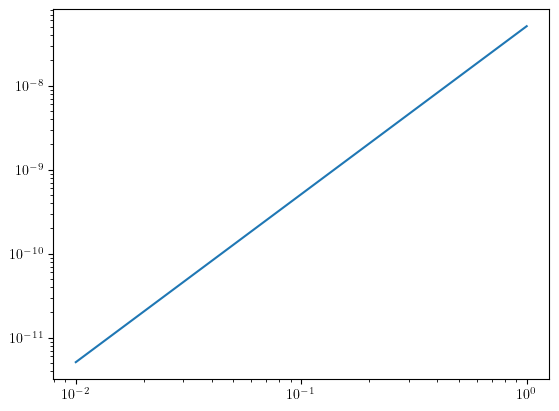

In [19]:
plt.loglog([10**x for x in np.linspace(-2, 0, 50)], [BR_BKa(10**c, 3.5, 3) for c in np.linspace(-2, 0, 50)])


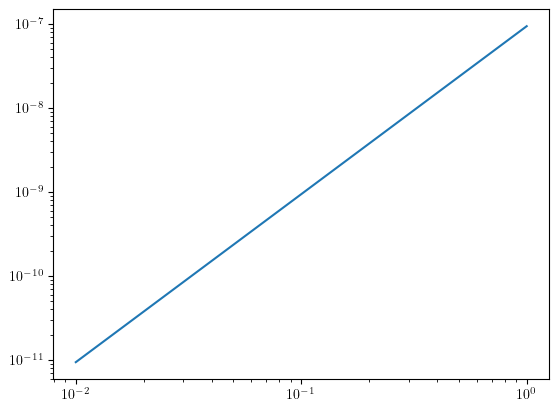

In [20]:
plt.loglog([10**x for x in np.linspace(-2, 0, 50)], [BR_BKa(10**c, .25, 3) for c in np.linspace(-2, 0, 50)])

In [21]:
data = []
for c in [10**x for x in np.linspace(-1.5, 0, 200)]:
    m = []
    tau = []
    BR = []
    for ma in np.linspace(0.25, 3.6, 300):
        BR_m = BR_BKa(c, ma, 3)
        if BR_m > 1e-10 and BR_m < 10**(-7):
            m.append(ma)
            tau.append(tau_alp(ma, c))
            BR.append(np.log10(BR_m))
    data.append({'m': m, 'tau': tau, 'BR': BR})

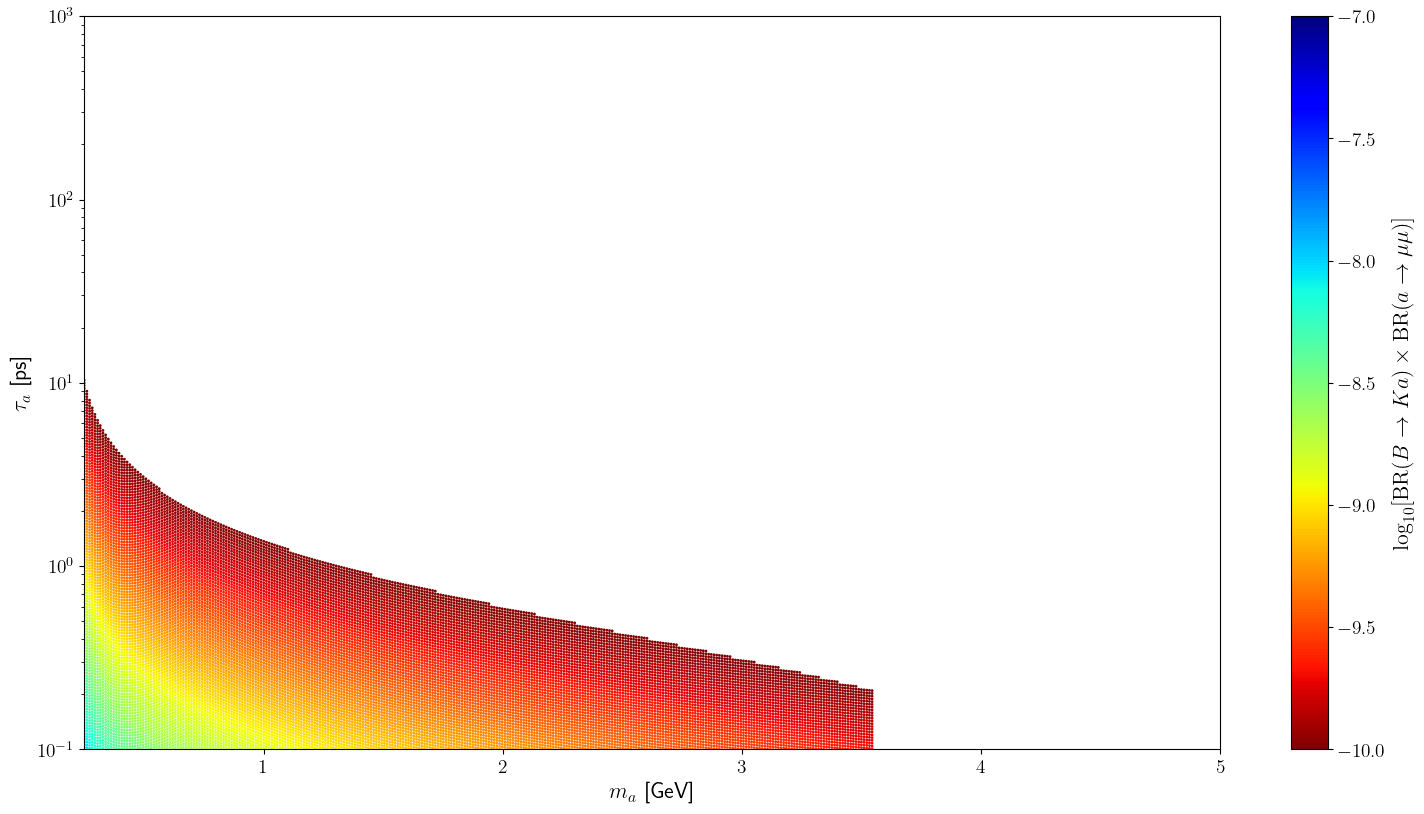

In [22]:
plt.figure(figsize=(15,8))
for d in data:
    plt.scatter(d['m'], d['tau'], c=d['BR'], s=1, vmin=-10, vmax=-7, cmap='jet_r')

plt.ylim([0.1, 1e3])
plt.xlim([0.25, 5])
plt.xlabel(r"$m_a$ [GeV]", fontsize=16)
plt.ylabel(r"$\tau_a$ [ps]", fontsize=16)


ax = plt.gca()
ax.set_yscale('log')
ax.tick_params(labelsize=14)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r"$\log_{10}[\mathrm{BR}(B\to K a)\times\mathrm{BR}(a\to\mu\mu)]$", fontsize=16)
plt.tight_layout(pad=0.2)

plt.savefig('displaced.png')

In [23]:
10**(-1.5)

0.03162277660168379

In [24]:
x_1 = [314.00438,
323.85120,
336.98031,
343.54486,
346.82713,
359.95624,
373.08534]

y_1 = [3.63446,
2.61567,
1.95528,
1.48023,
1.10651,
0.88116,
0.73813]

x_2 = [527.35230,
550.32823,
586.43326,
632.38512,
655.36105,
678.33698,
684.90153,
688.18381,
727.57112,
734.13567,
757.11160,
789.93435,
803.06346,
816.19256,
845.73304,
858.86214,
885.12035,
901.53173,
931.07221,
954.04814]

y_2 = [0.62619,
0.62224,
0.66708,
0.68417,
0.78633,
0.56591,
0.42842,
0.34991,
0.78633,
0.32433,
0.21095,
0.22758,
0.39460,
0.30833,
0.49239,
0.34117,
0.29311,
0.24553,
0.21635,
0.20568]

x_3 = [1082.05689,
1098.46827,
1114.87965,
1190.37199,
1219.91247,
1229.75930,
1288.84026,
1298.68709,
1315.09847,
1354.48578,
1380.74398]

y_3 = [0.24245,
0.20568,
0.16173,
0.16799,
0.28220,
0.20054,
0.24245,
0.21363,
0.16799,
0.19307,
0.17229]

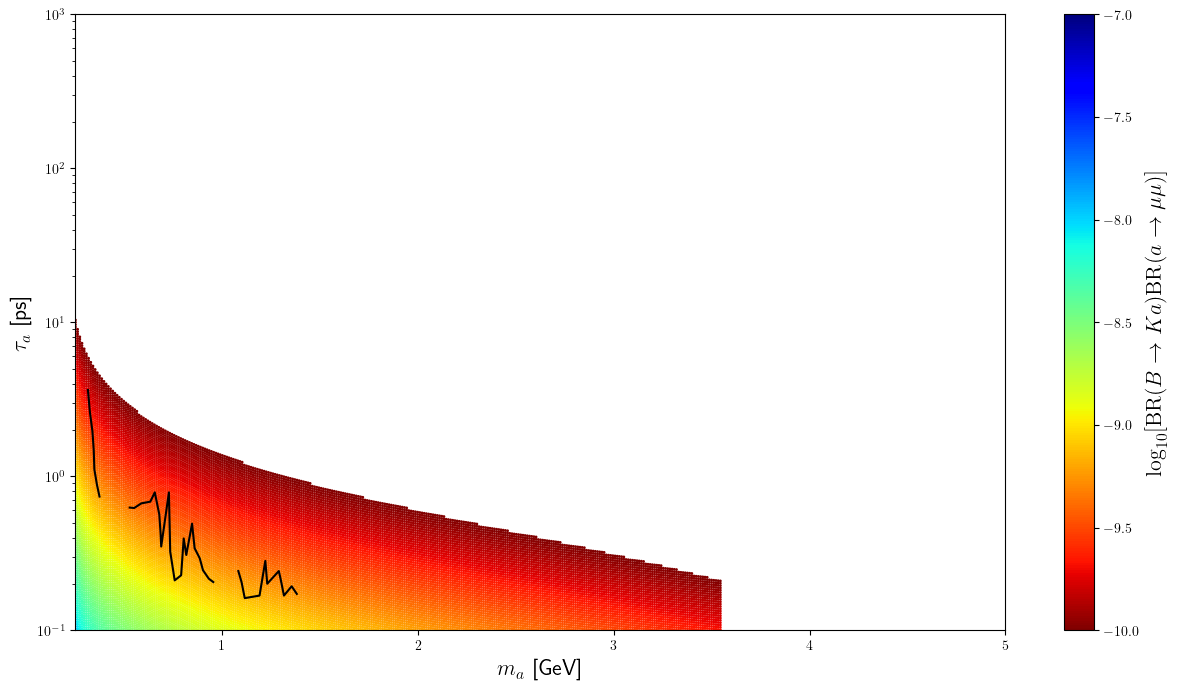

In [25]:
plt.figure(figsize=(15,8))


for d in data:
    plt.scatter(d['m'], d['tau'], c=d['BR'], s=1, vmin=-10, vmax=-7, cmap='jet_r')

plt.ylim([0.1, 1e3])
plt.xlim([0.25, 5])
plt.xlabel(r"$m_a$ [GeV]", fontsize=16)
plt.ylabel(r"$\tau_a$ [ps]", fontsize=16)


plt.plot(np.array(x_1)/1000, y_1, c='k')
plt.plot(np.array(x_2)/1000, y_2, c='k')
plt.plot(np.array(x_3)/1000, y_3, c='k')

ax = plt.gca()
ax.set_yscale('log')
cbar = plt.colorbar()
cbar.set_label(r"$\log_{10}[\mathrm{BR}(B\to K a)\mathrm{BR}(a\to\mu\mu)]$", fontsize=16)

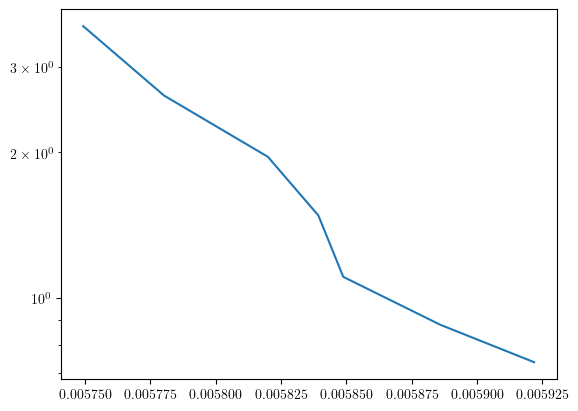

In [26]:
plt.semilogy(np.log(x_1)/1000, y_1)


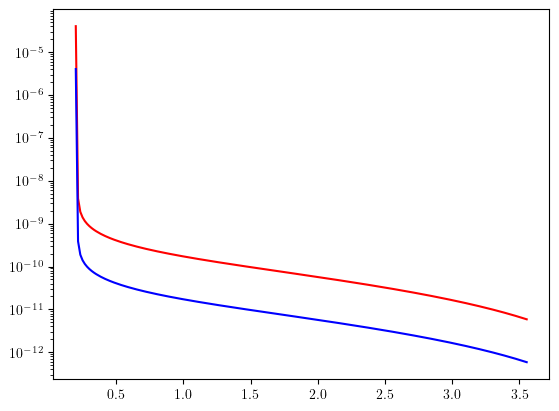

In [27]:
plt.semilogy(np.linspace(0.2, 2*mtau, 200), [BR_BKsa(tau_alp(m, 1)**0.5, m, 3) for m in np.linspace(0.2, 2*mtau, 200)], c='r')
plt.semilogy(np.linspace(0.2, 2*mtau, 200), [BR_BKsa((tau_alp(m, 1)/10)**0.5, m, 3) for m in np.linspace(0.2, 2*mtau, 200)], c='b')

In [28]:
import pandas as pd

In [29]:
lhcb_data = pd.read_csv("LHCb_BKs_displ.csv")

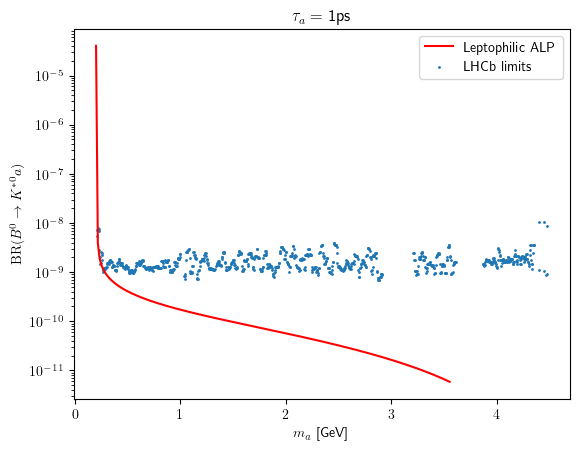

In [30]:
plt.plot(np.linspace(0.2, 2*mtau, 200), [BR_BKsa(tau_alp(m, 1)**0.5, m, 3) for m in np.linspace(0.2, 2*mtau, 200)], c='r', label='Leptophilic ALP')
plt.scatter(lhcb_data['ma_GeV'], lhcb_data['BR_BK*a'], s=1, label='LHCb limits')
ax = plt.gca()
ax.set_yscale('log')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$\mathrm{BR}(B^0\to K^{*0}a)$')
plt.legend()
plt.title(r'$\tau_a = $ 1ps')
plt.savefig('displaced_BKs.png')

In [31]:
2*mmu

0.211316751

In [32]:
def BR_BKsee(c, m, nlep):
    if m < 2*mmu:
        BRa = 1
    elif m < 2*mtau:
        BRa = me**2/mmu**2
    else:
        BRa = me**2/mtau**2
    return BRa * BR_BKsa(c, m, nlep)

def BR_BKee(c, m, nlep):
    if m < 2*mmu:
        BRa = 1
    elif m < 2*mtau:
        BRa = me**2/mmu**2
    else:
        BRa = me**2/mtau**2
    return BRa * BR_BKa(c, m, nlep)

def BR_BKsmumu(c, m, nlep):
    if m < 2*mmu:
        BRa = 0
    elif m < 2*mtau:
        BRa = 1
    else:
        BRa = mmu**2/mtau**2
    return BRa * BR_BKsa(c, m, nlep)

def BR_BKmumu(c, m, nlep):
    if m < 2*mmu:
        BRa = 0
    elif m < 2*mtau:
        BRa = 1
    else:
        BRa = mmu**2/mtau**2
    return BRa * BR_BKa(c, m, nlep)

/tmp/ipykernel_10187/3975953471.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))
/tmp/ipykernel_10187/3975953471.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


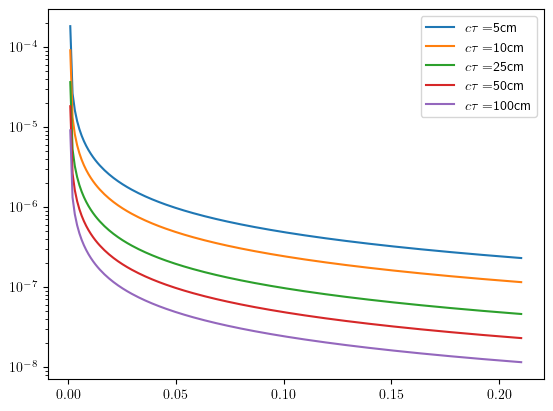

In [33]:
for ct in [5, 10, 25, 50, 100]:
    plt.semilogy(np.linspace(0, 1.99*mmu, 200), [BR_BKsee((tau_alp(m, 1)/(ct/0.03))**0.5, m, 3) for m in np.linspace(0, 1.99*mmu, 200)], label=f'$c\\tau = ${ct}cm')
plt.legend()

In [34]:
(tau_alp(1.9*mmu, 1)/(0.001/0.03))**0.5

97.30103994950942

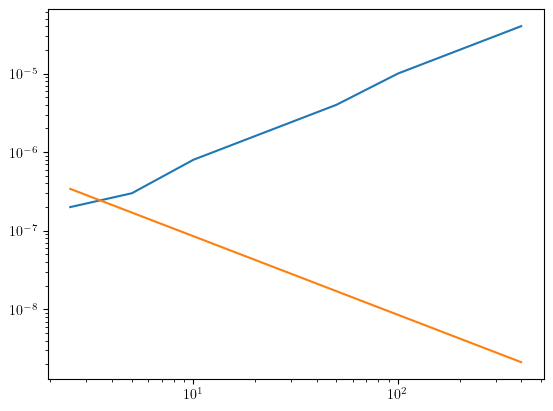

In [35]:
plt.loglog([2.5, 5, 10, 25, 50, 100, 200, 400], [2e-7, 3e-7, 8e-7, 2e-6, 4e-6, 1e-5, 2e-5, 4e-5])
plt.loglog([2.5, 5, 10, 25, 50, 100, 200, 400], [BR_BKee((tau_alp(1.99*mmu, 1)/(ct/0.03))**0.5, 1.99*mmu, 3) for ct in [2.5, 5, 10, 25, 50, 100, 200, 400]])

/tmp/ipykernel_10187/3975953471.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


(0.001, 20)

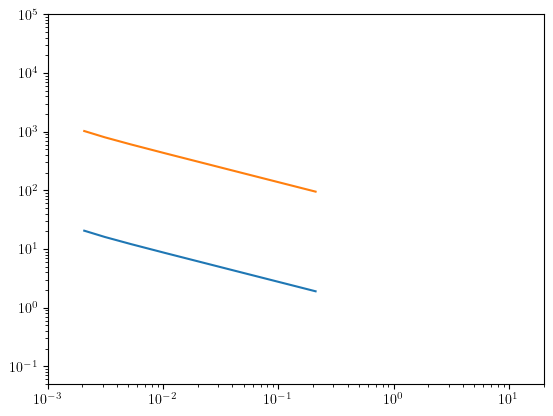

In [36]:
plt.loglog(np.linspace(2*me, 1.99*mmu, 200), [(tau_alp(m, 1)/(2.5/0.03) )**0.5 for m in np.linspace(2*me, 1.99*mmu, 200)])
plt.loglog(np.linspace(2*me, 1.99*mmu, 200), [(tau_alp(m, 1)/(0.001/0.03) )**0.5 for m in np.linspace(2*me, 1.99*mmu, 200)])
plt.ylim([5e-2, 1e5])
plt.xlim([1e-3, 20])

/tmp/ipykernel_10187/3975953471.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))
/tmp/ipykernel_10187/3975953471.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


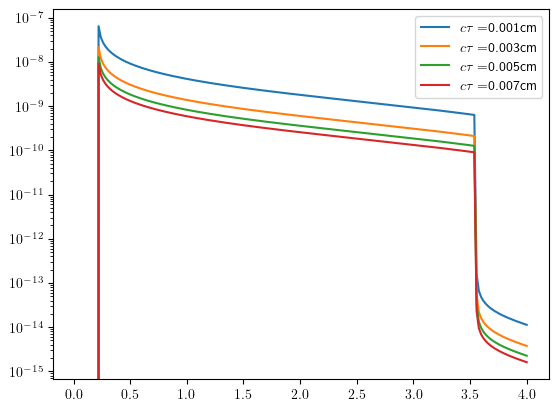

In [37]:
for ct in [0.001, 0.003, 0.005, 0.007]:
    plt.semilogy(np.linspace(0, 4, 200), [BR_BKmumu((tau_alp(m, 1)/(ct/0.03))**0.5, m, 3) for m in np.linspace(0, 4, 200)], label=f'$c\\tau = ${ct}cm')
plt.legend()

In [38]:
2*mmu

0.211316751

In [39]:
np.sqrt(((mB**2-mK**2+1)/(2*mB))**2-1)

2.5201447572835582

In [40]:
mB

5.27934

In [41]:
mK

0.49367700000000003

# $B\to K a(\to \gamma\gamma)$

## $\tau$-philic

In [42]:
Lambda = 1000
a_em = 1/137

def Gamma_agammagamma(cll, mphi: float) -> list[float]:
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    return cll**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2))**2

def Gamma_agammagamma_lep(cll, mphi: float) -> list[float]:
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    return cll**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2)+B1(4*mmu**2/mphi**2)+B1(4*me**2/mphi**2))**2

def tau_alp_gamma(cll, m):
    return hbar/Gamma_agammagamma(cll, m)

In [43]:
import pandas as pd

BaBar_1cm = pd.read_csv('BaBar_gamma_10mm.csv')
BaBar_10cm = pd.read_csv('BaBar_gamma_100mm.csv')

/tmp/ipykernel_10187/55662462.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return hbar/Gamma_agammagamma(cll, m)


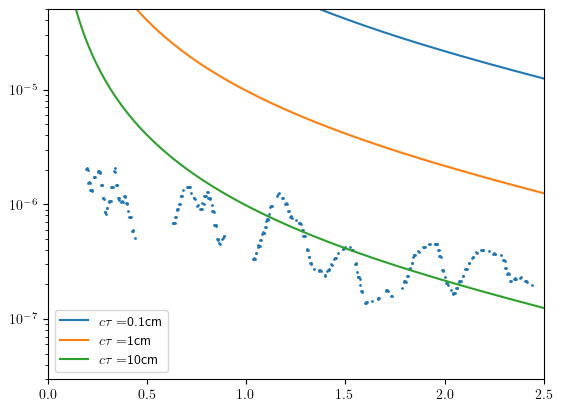

In [44]:
for ct in [0.1, 1, 10]:
    plt.plot(np.linspace(0, 2.5, 200), [BR_BKa((tau_alp_gamma(m, 1)/(ct/0.03))**0.5, m) for m in np.linspace(0, 2.5, 200)], label=f'$c\\tau = ${ct}cm')
plt.scatter(BaBar_10cm['ma_GeV'], BaBar_10cm['BR_gammagamma'], s=1)
plt.legend()
plt.ylim([3e-8, 5e-5])
plt.xlim([0, 2.5])
ax = plt.gca()
ax.set_yscale('log')

In [45]:
bound_gamma = []
for (m, BR) in zip(BaBar_10cm['ma_GeV'], BaBar_10cm['BR_gammagamma']):
    if BR < BR_BKa((tau_alp_gamma(m, 1)/(10/0.03))**0.5, m):
        bound_gamma.append((tau_alp_gamma(m, 1)/(10/0.03))**0.5)
    else:
        bound_gamma.append((tau_alp_gamma(m, 1)/(1/0.03))**0.5)        

(0.05, 100000.0)

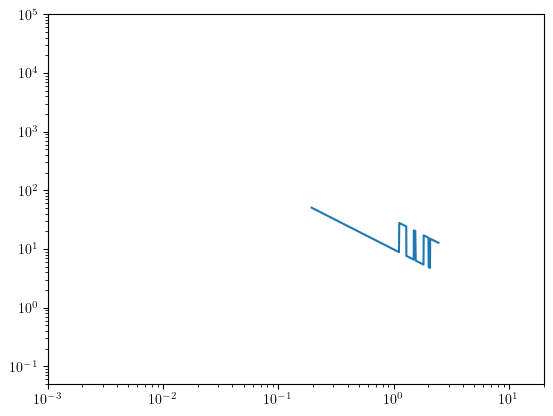

In [46]:
plt.loglog(BaBar_10cm['ma_GeV'], bound_gamma)
plt.xlim(1e-3, 20)
plt.ylim(5e-2, 1e5)

## LFU

In [47]:
def BR_BKgammagamma(cll, ma):
    return BR_BKa(cll, ma, 3)*Gamma_agammagamma(cll, ma)*tau_alp(ma, cll)/hbar

/tmp/ipykernel_10187/55662462.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return hbar/Gamma_agammagamma(cll, m)
/tmp/ipykernel_10187/55662462.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  return cll**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2))**2
/tmp/ipykernel_10187/55662462.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  return cll**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2))**2
/tmp/ipykernel_10187/55662462.py:10: RuntimeWarning: invalid value encountered in scalar multiply
  B1 = lambda x: 1-x*f(x)**2
/tmp/ipykernel_10187/3975953471.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))
/tmp/ipykernel_10187/3975953471.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 8*np.pi*fa**2*hbar/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))
/tmp/ipykernel_10187/3975953

(0.0, 2.5)

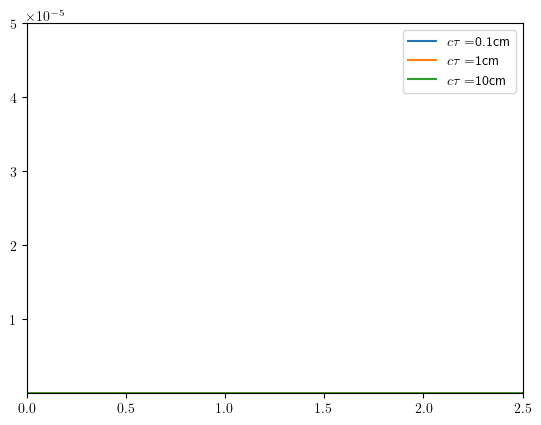

In [49]:
for ct in [0.1, 1, 10]:
    plt.plot(np.linspace(0, 2.5, 200), [BR_BKgammagamma((tau_alp_gamma(m, 1)/(ct/0.03))**0.5, m) for m in np.linspace(0, 2.5, 200)], label=f'$c\\tau = ${ct}cm')
plt.legend()
plt.ylim([3e-8, 5e-5])
plt.xlim([0, 2.5])